# Project Title: Google Playstore Analysis
<img src="google_img.png" />

## Introduction:
The dataset is chosen from Kaggle. It is the web scraped data of 10k Play Store apps for analyzing the Android market. It consists of in total of 10841 rows and 13 columns. It has 13 different features such as 'Category', 'Rating', 'Reviews', 'Size' etc.
Here there are mixture of all kind of data string, float and int type of data.

This project is a part of zerotopandas course from Jovian.com[the course](http://zerotopandas.com).


In [1]:
project_name = "Google_appstore_analysis" 

In [2]:
!pip install jovian --upgrade -q

In [3]:
import jovian

In [5]:
jovian.commit(project=project_name,files=['googleplaystore.csv'])

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "nishanth-k-s/google-appstore-analysis" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Uploading additional files...
[jovian] Committed successfully! https://jovian.ml/nishanth-k-s/google-appstore-analysis


'https://jovian.ml/nishanth-k-s/google-appstore-analysis'

## Data Preparation and Cleaning

TODO

Import the required libraries, such as:
- pandas:working on tabular data 
- numpy: For working with arrays. 
- seaborn and matlotlib.pyplot:Visualization.

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

`%matplotlib` inline to ensure that plots are shown and embedded within the Jupyter notebook itself. Without this command, sometimes plots may show up in pop-up windows.

read the datasata set using pd.read_csv() function.

In [7]:
google_df = pd.read_csv('googleplaystore.csv')

In [8]:
google_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [9]:
type(google_df)

pandas.core.frame.DataFrame

This dataset is a type DataFrame, which his in 2-dimensional form which stores all kinds of data in float, int,string,boolean in columns and rows.    

In [10]:
google_df.sample(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
901,Harkins Theatres,ENTERTAINMENT,4.3,1511,12M,"100,000+",Free,0,Everyone,Entertainment,"June 11, 2018",2.1.1,4.1 and up
9722,EP Search and Find,FAMILY,NaN,20,23M,500+,Free,0,Everyone,Casual,"May 27, 2015",1.0.0,2.3 and up
1632,Fashion in Vogue,LIFESTYLE,3.8,1797,6.8M,"100,000+",Free,0,Everyone,Lifestyle,"September 27, 2016",2.0,4.3 and up
861,TV+,ENTERTAINMENT,4.2,98509,Varies with device,"5,000,000+",Free,0,Everyone,Entertainment,"June 28, 2018",Varies with device,Varies with device
4815,"Zapya - File Transfer, Sharing",TOOLS,4.6,387958,9.0M,"10,000,000+",Free,0,Teen,Tools,"July 16, 2018",5.6.2 (US),4.0.3 and up
2895,HD Camera for Android,PHOTOGRAPHY,4.1,351254,4.0M,"10,000,000+",Free,0,Everyone,Photography,"June 29, 2018",4.6.0.0,4.2 and up
8140,CZ-27 pistol explained,BOOKS_AND_REFERENCE,NaN,1,11M,10+,Paid,$5.99,Everyone,Books & Reference,"September 2, 2015",Android 3.0 - 2015,1.6 and up
7792,Jetting for Honda CR dirt bike,SPORTS,4.1,7,3.4M,100+,Paid,$3.49,Everyone,Sports,"April 13, 2016",2.2,3.0 and up
8212,Scale Models DB,TOOLS,4.4,9,33M,50+,Paid,$2.99,Everyone,Tools,"May 3, 2018",0.6.2,4.3 and up
7884,Simpli CT,TOOLS,NaN,4,11M,100+,Free,0,Everyone,Tools,"November 30, 2017",1.0.2,4.3 and up


we can view the random sample using the sample() function.

In [11]:
google_df.shape

(10841, 13)

In [12]:
google_df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

above we can see all the column names in the dataframe.

In [13]:
google_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


From the info() we get to know that few columns contains some null values. 

In [14]:
google_df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


only Rating is of type float so its statstical information is displayed.<br>
Type object contains the mixture of either string, float or int data type.

In [15]:
google_df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

we found how many null values present in each column, here we can see that Rating has more null values 

In [16]:
google_df.drop(google_df.index[google_df.Rating.isnull()], inplace=True)

Dropped all the rows where there are no values found in Rating column.

In [17]:
google_df.shape

(9367, 13)

In [18]:
google_df[google_df.Rating>5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


Check if there any row which has rating greater than 5. Google playstore has a maximum rating of 5 and minimum rating of 1.<br> it is found index 10472 has rating 19.0, so let us drop this row from our analysis. 

In [19]:
len(google_df[google_df.Rating<1])

0

Also checked for the rating less than 1, it's good to see row has that value.

In [20]:
google_df.drop([10472],inplace=True)

Dropped the 10472th row using drop function.

In [21]:
google_df.shape

(9366, 13)

After dropping some rows from the dataframe we have 9366 columns.

In [22]:
google_df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       4
Android Ver       2
dtype: int64

As we have seen Price have '$', Installs has '+' and Size has 'M' along with values which make the type object. In order to covert to numberic data type, first we need to remove these character's.

In [23]:
google_df['Price']= google_df['Price'].map(lambda x: x.lstrip('$').rstrip() )

In [24]:
google_df['Price'].sample(5)

280      0
3817     0
4118     0
2199     0
10277    0
Name: Price, dtype: object

In [25]:
google_df['Installs'] =google_df['Installs'].map(lambda x: x.rstrip('+'))
google_df['Installs'] = google_df['Installs'].map(lambda x: ''.join(x.split(',')))

In [26]:
google_df['Installs'].sample(5)

2882     5000000
2806     1000000
7922       50000
7883       10000
8535    10000000
Name: Installs, dtype: object

In [27]:
google_df['Size'] = google_df['Size'].map(lambda x: x.rstrip('M'))
google_df['Size'] = google_df['Size'].map(lambda x: str(round((float(x.rstrip('k'))/1024), 1)) if x[-1]=='k' else x)
google_df['Size'] = google_df['Size'].map(lambda x: np.nan if x.startswith('Varies') else x)

In [28]:
google_df['Size'].sample(5)

7253    4.7
6347     10
8365     28
2358     12
3729    NaN
Name: Size, dtype: object

Now let us convet the Prize, installs, Size and Reviews to numerical values.

In [29]:
google_df['Reviews'] = pd.to_numeric(google_df['Reviews'], errors='coerce')
google_df['Price'] = pd.to_numeric(google_df['Price'], errors='coerce')
google_df['Size'] = pd.to_numeric(google_df['Size'], errors='coerce')
google_df['Installs'] = pd.to_numeric(google_df['Installs'], errors='coerce')

In [30]:
google_df.sample(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4630,Hollywood U: Rising Stars,FAMILY,4.2,233588,74.0,5000000,Free,0.0,Teen,Simulation,"April 21, 2017",3.8.0,4.0.3 and up
6074,Be you GO Launcher Theme,PERSONALIZATION,4.3,1580,3.6,100000,Free,0.0,Everyone,Personalization,"November 12, 2014",v1.0,2.3 and up
362,TouchPal Keyboard - Fun Emoji & Android Keyboard,COMMUNICATION,4.4,615381,37.0,10000000,Free,0.0,Mature 17+,Communication,"August 2, 2018",6.7.9.1,4.0.3 and up
7013,Tattoo Color By Number Draw Book Page Pixel Art,FAMILY,4.0,309,25.0,100000,Free,0.0,Everyone,Entertainment,"May 2, 2018",1.4,4.1 and up
6896,BW Smart,TOOLS,3.7,50,19.0,5000,Free,0.0,Everyone,Tools,"June 6, 2017",v1.2.2,4.0 and up


In [31]:
google_df.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


In [32]:
google_df.describe()

,Rating,Reviews,Size,Installs,Price
count,9366.000000,9.366000e+03,7729.000000,9.366000e+03,9366.000000
mean,4.191757,5.140498e+05,22.957252,1.789744e+07,0.960928
std,0.515219,3.144042e+06,23.445831,9.123822e+07,15.816585
min,1.000000,1.000000e+00,0.000000,1.000000e+00,0.000000
25%,4.000000,1.862500e+02,5.300000,1.000000e+04,0.000000
50%,4.300000,5.930500e+03,14.000000,5.000000e+05,0.000000
75%,4.500000,8.153275e+04,33.000000,5.000000e+06,0.000000
max,5.000000,7.815831e+07,100.000000,1.000000e+09,400.000000


In [33]:
import jovian

In [34]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "nishanth-k-s/google-appstore-analysis" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/nishanth-k-s/google-appstore-analysis


'https://jovian.ml/nishanth-k-s/google-appstore-analysis'

## Exploratory Analysis and Visualization

TODO

In [35]:
google_df['Rating'].dtype

dtype('float64')

In [36]:
google_df['Reviews'].dtype

dtype('int64')

In [37]:
google_df['Price'].dtype

dtype('float64')

In [38]:
apps_rating  = google_df.groupby('Category').Rating.agg(['mean','min','max'])

In [39]:
apps_review= google_df.groupby('Category').Reviews.agg(['mean','min','max'])

In [40]:
apps_price = google_df.groupby('Category').Price.sum()

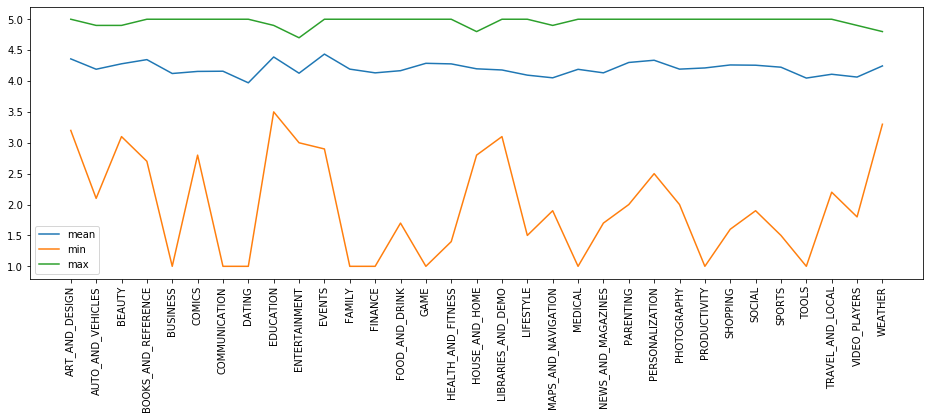

In [41]:
plt.figure(figsize=(16,5))
plt.plot(apps_rating)
plt.xticks(rotation=90)
plt.legend(apps_rating);

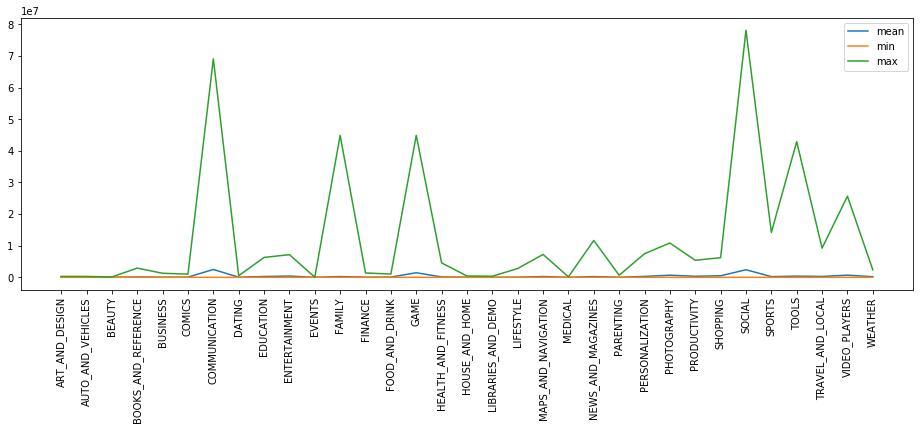

In [42]:
plt.figure(figsize=(16,5))
plt.plot(apps_review)
plt.xticks(rotation=90)
plt.legend(apps_review);

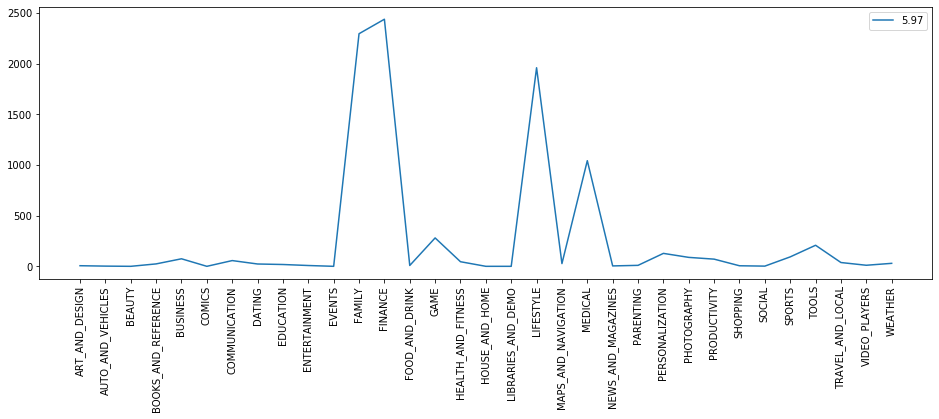

In [43]:
plt.figure(figsize=(16,5))
plt.plot(apps_price)
plt.xticks(rotation=90)
plt.legend(apps_price);

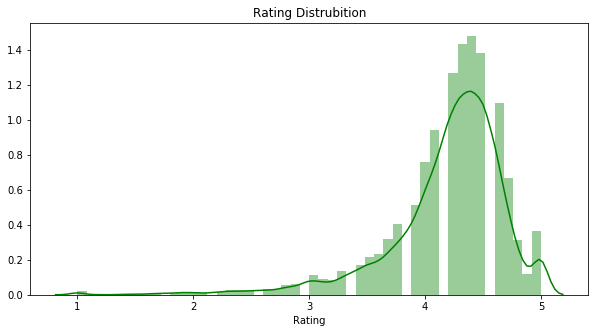

In [44]:
#histogram
plt.figure(figsize=(10,5))
sns.distplot(google_df['Rating'],color='g');
plt.title("Rating Distrubition")
plt.show()

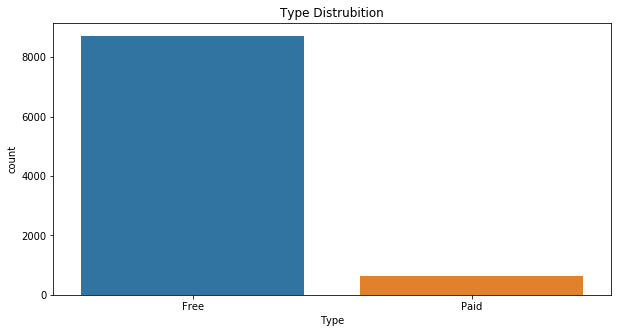

In [45]:
#histogram
plt.figure(figsize=(10,5))
sns.countplot(google_df['Type'])
plt.title("Type Distrubition")
plt.show();

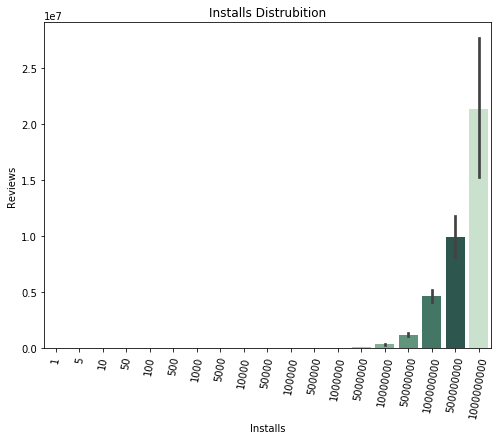

In [46]:
#histogram
plt.figure(figsize=(8,6))
sns.barplot(x=google_df['Installs'],y=google_df.Reviews,color='b',palette=sns.color_palette("ch:2.5,-.2,dark=.3"))
plt.title("Installs Distrubition")
plt.xticks(rotation=80)
plt.show();

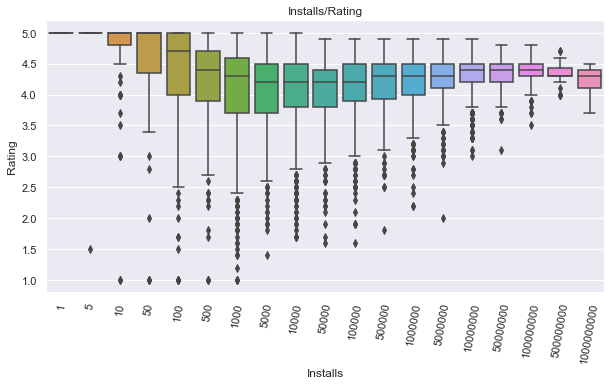

In [47]:
#boxplot plot installs/rates
ax = plt.figure(figsize=(10,5))
sns.set()
sns.boxplot(x="Installs", y="Rating", data=google_df)
plt.title("Installs/Rating")
plt.xticks(rotation=80)
plt.show();

As Installs increases, we can see that Rating gets higher values.

This means that many downloaded applications have higher ratings.

In [48]:
google_df.cov()

,Rating,Reviews,Size,Installs,Price
Rating,2.654505e-01,1.103803e+05,1.069156e+00,2.414057e+06,-1.784901e-01
Reviews,1.103803e+05,9.885001e+12,1.050240e+07,1.840508e+14,-4.883245e+05
Size,1.069156e+00,1.050240e+07,5.497070e+02,1.913297e+08,-1.070834e+01
Installs,2.414057e+06,1.840508e+14,1.913297e+08,8.324412e+15,-1.715850e+07
Price,-1.784901e-01,-4.883245e+05,-1.070834e+01,-1.715850e+07,2.501643e+02


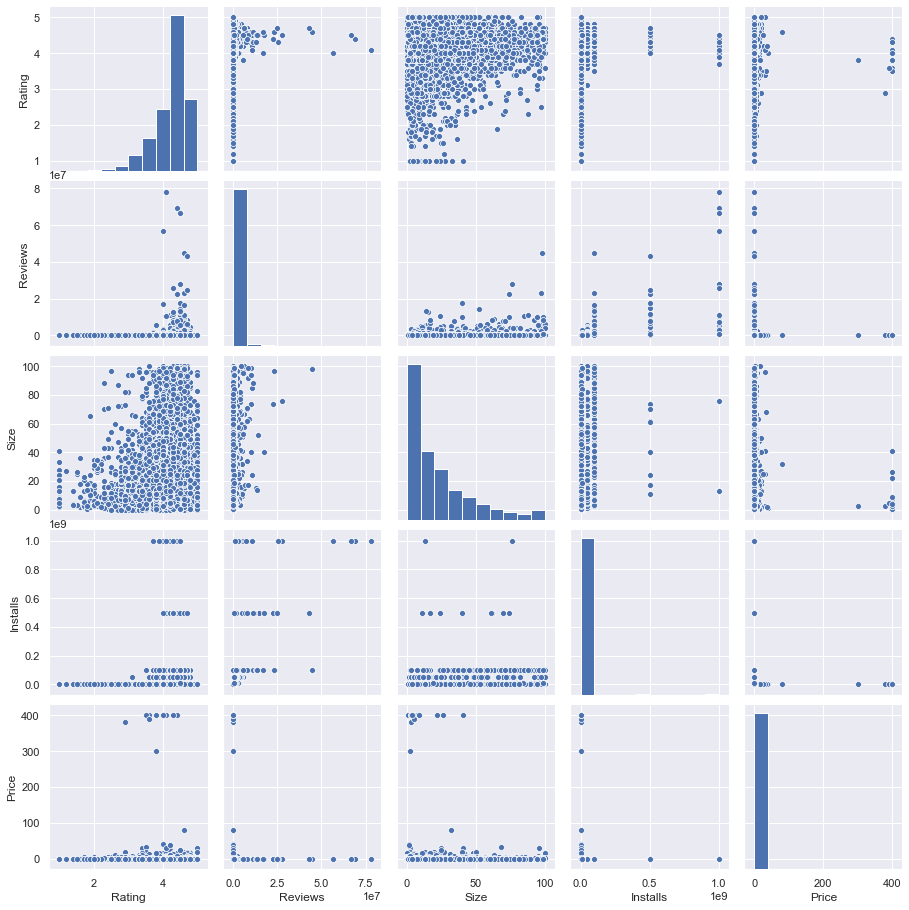

In [49]:
sns.pairplot(google_df);

In [50]:
google_df.cov()

,Rating,Reviews,Size,Installs,Price
Rating,2.654505e-01,1.103803e+05,1.069156e+00,2.414057e+06,-1.784901e-01
Reviews,1.103803e+05,9.885001e+12,1.050240e+07,1.840508e+14,-4.883245e+05
Size,1.069156e+00,1.050240e+07,5.497070e+02,1.913297e+08,-1.070834e+01
Installs,2.414057e+06,1.840508e+14,1.913297e+08,8.324412e+15,-1.715850e+07
Price,-1.784901e-01,-4.883245e+05,-1.070834e+01,-1.715850e+07,2.501643e+02


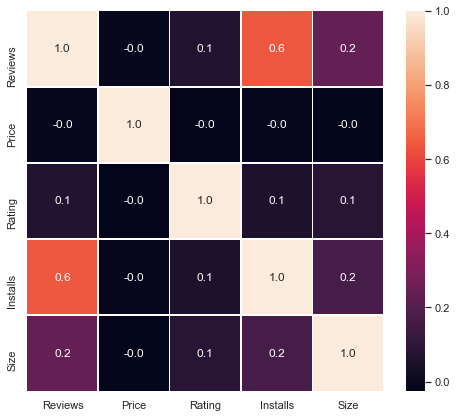

In [51]:
fig,ax = plt.subplots(figsize=(8,7))
ax = sns.heatmap(google_df[["Reviews","Price","Rating","Installs","Size"]].corr(), annot=True,linewidths=.5,fmt='.1f')
plt.show()

In [52]:
import jovian

In [53]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "nishanth-k-s/google-appstore-analysis" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/nishanth-k-s/google-appstore-analysis


'https://jovian.ml/nishanth-k-s/google-appstore-analysis'

## Asking and Answering Questions

TODO

### How many apps are there in each category?

In [54]:
dif_cat=google_df.groupby('Category')

In [55]:
dif_cat.groups

{'ART_AND_DESIGN': Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
               11,   12,   13,   14,   15,   16,   17,   18,   19,   20,   21,
               22,   24,   25,   26,   27,   28,   29,   30,   31,   32,   33,
               34,   35,   36,   37,   38,   39,   40,   41,   42,   43,   44,
               45,   46,   47,   48, 3982, 4193, 4241, 4749, 4755, 4759, 4764,
             5179, 5254, 5258, 6930, 8679, 8712, 8888],
            dtype='int64'),
 'AUTO_AND_VEHICLES': Int64Index([   49,    50,    51,    52,    53,    54,    55,    56,    57,
                58,    59,    60,    61,    62,    63,    64,    65,    66,
                67,    68,    69,    70,    71,    72,    73,    74,    75,
                76,    77,    78,    79,    80,    81,    82,    83,    84,
                85,    86,    87,    88,    89,    90,    91,    92,    93,
                94,    95,    96,    97,  4120,  4216,  4376,  4622,  5015,
              5310,  6129,

In [56]:
num_apps=dif_cat['App'].nunique()

In [57]:
num_apps

Category
ART_AND_DESIGN           61
AUTO_AND_VEHICLES        73
BEAUTY                   42
BOOKS_AND_REFERENCE     169
BUSINESS                263
COMICS                   54
COMMUNICATION           257
DATING                  134
EDUCATION               118
ENTERTAINMENT           102
EVENTS                   45
FAMILY                 1684
FINANCE                 302
FOOD_AND_DRINK           94
GAME                    913
HEALTH_AND_FITNESS      244
HOUSE_AND_HOME           62
LIBRARIES_AND_DEMO       64
LIFESTYLE               301
MAPS_AND_NAVIGATION     118
MEDICAL                 291
NEWS_AND_MAGAZINES      204
PARENTING                50
PERSONALIZATION         298
PHOTOGRAPHY             263
PRODUCTIVITY            301
SHOPPING                180
SOCIAL                  203
SPORTS                  262
TOOLS                   720
TRAVEL_AND_LOCAL        187
VIDEO_PLAYERS           149
WEATHER                  72
Name: App, dtype: int64

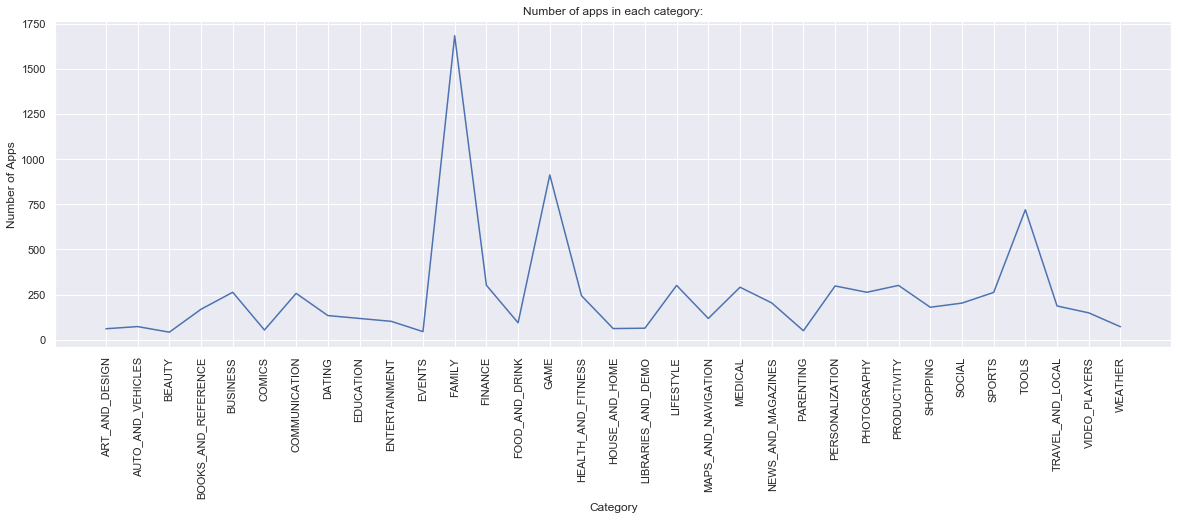

In [58]:
plt.figure(figsize=(20,6))
plt.plot(num_apps)
plt.xticks(rotation=90)
plt.title("Number of apps in each category:")
plt.xlabel('Category')
plt.ylabel('Number of Apps');

From Graph we can notice that largest number of apps falls in Family Category followed by Games and Tools.

### Which are the top rated Gaming Apps which has more than 10 million Installs?

In [59]:
Games=dif_cat.get_group('GAME')

In [60]:
Games.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1653,ROBLOX,GAME,4.5,4447388,67.0,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1654,Subway Surfers,GAME,4.5,27722264,76.0,1000000000,Free,0.0,Everyone 10+,Arcade,"July 12, 2018",1.90.0,4.1 and up
1655,Candy Crush Saga,GAME,4.4,22426677,74.0,500000000,Free,0.0,Everyone,Casual,"July 5, 2018",1.129.0.2,4.1 and up
1656,Solitaire,GAME,4.7,254258,23.0,10000000,Free,0.0,Everyone,Card,"August 1, 2018",2.137.0,4.1 and up
1657,Bubble Shooter,GAME,4.5,148897,46.0,10000000,Free,0.0,Everyone,Casual,"July 17, 2018",1.20.1,4.0.3 and up


In [61]:
Top_Game=Games[Games.Installs>10e7].sort_values('Rating',ascending=False)

In [62]:
Top_Game

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1654,Subway Surfers,GAME,4.5,27722264,76.0,1000000000,Free,0.0,Everyone 10+,Arcade,"July 12, 2018",1.90.0,4.1 and up
3896,Subway Surfers,GAME,4.5,27711703,76.0,1000000000,Free,0.0,Everyone 10+,Arcade,"July 12, 2018",1.90.0,4.1 and up
1700,Subway Surfers,GAME,4.5,27723193,76.0,1000000000,Free,0.0,Everyone 10+,Arcade,"July 12, 2018",1.90.0,4.1 and up
1722,My Talking Tom,GAME,4.5,14891223,NaN,500000000,Free,0.0,Everyone,Casual,"July 19, 2018",4.8.0.132,4.1 and up
1917,Subway Surfers,GAME,4.5,27725352,76.0,1000000000,Free,0.0,Everyone 10+,Arcade,"July 12, 2018",1.90.0,4.1 and up
1750,Subway Surfers,GAME,4.5,27724094,76.0,1000000000,Free,0.0,Everyone 10+,Arcade,"July 12, 2018",1.90.0,4.1 and up
1872,Subway Surfers,GAME,4.5,27725352,76.0,1000000000,Free,0.0,Everyone 10+,Arcade,"July 12, 2018",1.90.0,4.1 and up
1908,My Talking Tom,GAME,4.5,14892469,NaN,500000000,Free,0.0,Everyone,Casual,"July 19, 2018",4.8.0.132,4.1 and up
1966,Candy Crush Saga,GAME,4.4,22430188,74.0,500000000,Free,0.0,Everyone,Casual,"July 5, 2018",1.129.0.2,4.1 and up
1705,Candy Crush Saga,GAME,4.4,22428456,74.0,500000000,Free,0.0,Everyone,Casual,"July 5, 2018",1.129.0.2,4.1 and up


In [63]:
Top_Game.drop_duplicates(subset='App').head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1654,Subway Surfers,GAME,4.5,27722264,76.0,1000000000,Free,0.0,Everyone 10+,Arcade,"July 12, 2018",1.90.0,4.1 and up
1722,My Talking Tom,GAME,4.5,14891223,NaN,500000000,Free,0.0,Everyone,Casual,"July 19, 2018",4.8.0.132,4.1 and up
1966,Candy Crush Saga,GAME,4.4,22430188,74.0,500000000,Free,0.0,Everyone,Casual,"July 5, 2018",1.129.0.2,4.1 and up
1886,Temple Run 2,GAME,4.3,8119151,62.0,500000000,Free,0.0,Everyone,Action,"July 5, 2018",1.49.1,4.0 and up
1885,Pou,GAME,4.3,10486018,24.0,500000000,Free,0.0,Everyone,Casual,"May 25, 2018",1.4.77,4.0 and up


### Which are the most popular family app with Good rating?

In order to find popular apps, we need to find out the apps with highest number of installation and with highest rating.

In [64]:
Family=dif_cat.get_group('FAMILY')

In [65]:
Family.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2014,YouTube Kids,FAMILY,4.5,470694,NaN,50000000,Free,0.0,Everyone,Entertainment;Music & Video,"August 3, 2018",3.43.3,4.1 and up
2015,Candy Bomb,FAMILY,4.4,42145,20.0,10000000,Free,0.0,Everyone,Casual;Brain Games,"July 4, 2018",2.9.3181,4.0.3 and up
2016,ROBLOX,FAMILY,4.5,4449910,67.0,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2017,Jewels Crush- Match 3 Puzzle,FAMILY,4.4,14774,19.0,1000000,Free,0.0,Everyone,Casual;Brain Games,"July 23, 2018",1.9.3901,4.0.3 and up
2018,Coloring & Learn,FAMILY,4.4,12753,51.0,5000000,Free,0.0,Everyone,Educational;Creativity,"July 17, 2018",1.49,4.0.3 and up


In [66]:
Top_Family=Family[Family.Installs>10e6].sort_values('Rating',ascending=False)

In [67]:
Top_Family

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
8439,Duolingo: Learn Languages Free,FAMILY,4.7,6297590,NaN,100000000,Free,0.0,Everyone,Education;Education,"August 6, 2018",Varies with device,Varies with device
2216,Duolingo: Learn Languages Free,FAMILY,4.7,6294397,NaN,100000000,Free,0.0,Everyone,Education;Education,"August 1, 2018",Varies with device,Varies with device
2056,Duolingo: Learn Languages Free,FAMILY,4.7,6294400,NaN,100000000,Free,0.0,Everyone,Education;Education,"August 1, 2018",Varies with device,Varies with device
7501,Castle Clash: Heroes of the Empire US,FAMILY,4.6,4578890,24.0,50000000,Free,0.0,Everyone 10+,Strategy,"July 17, 2018",1.4.51,4.1 and up
3986,Clash of Clans,FAMILY,4.6,44881447,98.0,100000000,Free,0.0,Everyone 10+,Strategy,"July 15, 2018",10.322.16,4.1 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10513,Flight Simulator: Fly Plane 3D,FAMILY,4.0,660613,21.0,50000000,Free,0.0,Everyone,Simulation,"March 1, 2017",1.32,2.3 and up
10010,Mobile Strike,FAMILY,3.9,903392,NaN,50000000,Free,0.0,Everyone 10+,Strategy,"June 14, 2018",3.30.4.207,4.1 and up
6070,Hair Salon - Fun Games,FAMILY,3.8,484226,27.0,50000000,Free,0.0,Teen,Casual,"June 15, 2018",3.0.10,4.0 and up
10196,Fart sound pranks,FAMILY,3.8,283823,NaN,50000000,Free,0.0,Everyone 10+,Casual,"November 23, 2016",Varies with device,Varies with device


We can notice here "Candy Crush Saga", "Clash of Clans" , "Pou" etc which are basiclly gaming category but it is Categorized in Family as well. So Family Apps include some light weight games as well.

The list is topped by 	"Duolingo: Learn Languages Free",  so we can conclude that `"Duolingo"` the most popular and good rated app.
People are slightly more interested in learning new languages. Which would help them as tourist, student or as an employee in foreign countries.

In [68]:
Entertainment=dif_cat.get_group('ENTERTAINMENT')

In [69]:
Entertainment.sort_values('Installs',ascending=False).head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
865,Google Play Games,ENTERTAINMENT,4.3,7165362,NaN,1000000000,Free,0.0,Teen,Entertainment,"July 16, 2018",Varies with device,Varies with device
855,Netflix,ENTERTAINMENT,4.4,5456208,NaN,100000000,Free,0.0,Teen,Entertainment,"July 31, 2018",Varies with device,Varies with device
874,Talking Angela,ENTERTAINMENT,3.7,1828284,52.0,100000000,Free,0.0,Everyone,Entertainment,"July 12, 2018",2.8.2,4.1 and up
893,Talking Ben the Dog,ENTERTAINMENT,4.3,1633682,57.0,100000000,Free,0.0,Everyone,Entertainment,"July 3, 2018",3.5.2.2,4.1 and up
931,Netflix,ENTERTAINMENT,4.4,5456599,NaN,100000000,Free,0.0,Teen,Entertainment,"July 31, 2018",Varies with device,Varies with device


### Which are the Social Category Apps has highest installs?

In [70]:
Social=dif_cat.get_group('SOCIAL')

In [71]:
Top_social = Social.sort_values('Installs',ascending=False)

In [72]:
TS=Top_social.drop_duplicates(subset='App').head(15)

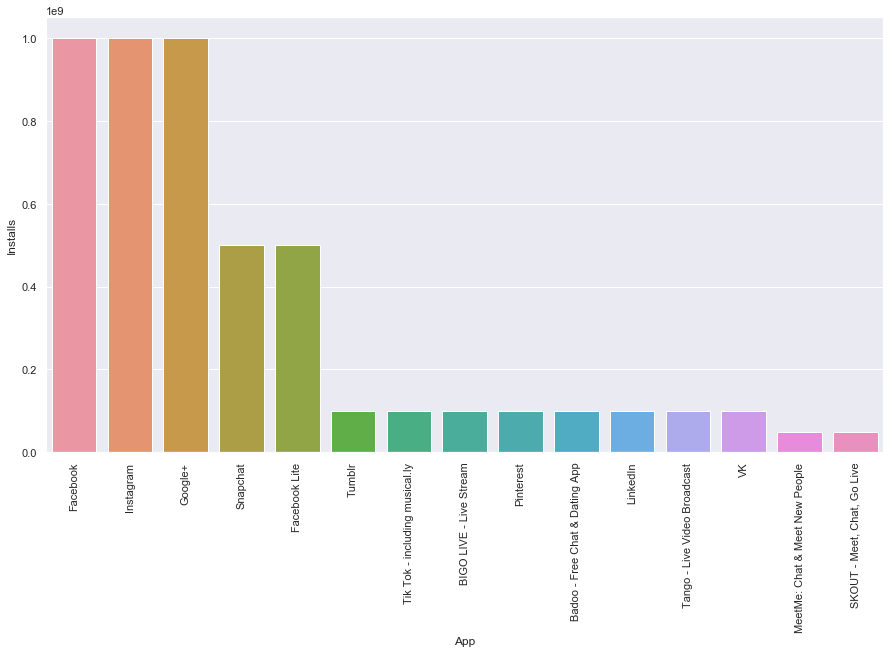

In [73]:
plt.figure(figsize=(15,8))
sns.set(style="darkgrid")
sns.barplot(x = 'App', y = 'Installs', data = TS)
plt.xticks(rotation=90);

From the graph it is evedent that `Facebook`, `Instagram`,`Google+` are the top 3 installed apps wih highest number of users.

### Which Category has Expensive Apps for the Customer?

In [74]:
dif_cat.Price.sum()

Category
ART_AND_DESIGN            5.97
AUTO_AND_VEHICLES         1.99
BEAUTY                    0.00
BOOKS_AND_REFERENCE      23.88
BUSINESS                 74.39
COMICS                    0.00
COMMUNICATION            56.69
DATING                   22.96
EDUCATION                17.96
ENTERTAINMENT             7.98
EVENTS                    0.00
FAMILY                 2296.74
FINANCE                2439.87
FOOD_AND_DRINK            8.48
GAME                    280.36
HEALTH_AND_FITNESS       45.38
HOUSE_AND_HOME            0.00
LIBRARIES_AND_DEMO        0.00
LIFESTYLE              1960.88
MAPS_AND_NAVIGATION      26.95
MEDICAL                1043.14
NEWS_AND_MAGAZINES        3.98
PARENTING                 9.58
PERSONALIZATION         127.76
PHOTOGRAPHY              88.24
PRODUCTIVITY             70.92
SHOPPING                  5.48
SOCIAL                    1.98
SPORTS                   93.21
TOOLS                   207.90
TRAVEL_AND_LOCAL         37.49
VIDEO_PLAYERS            10.46

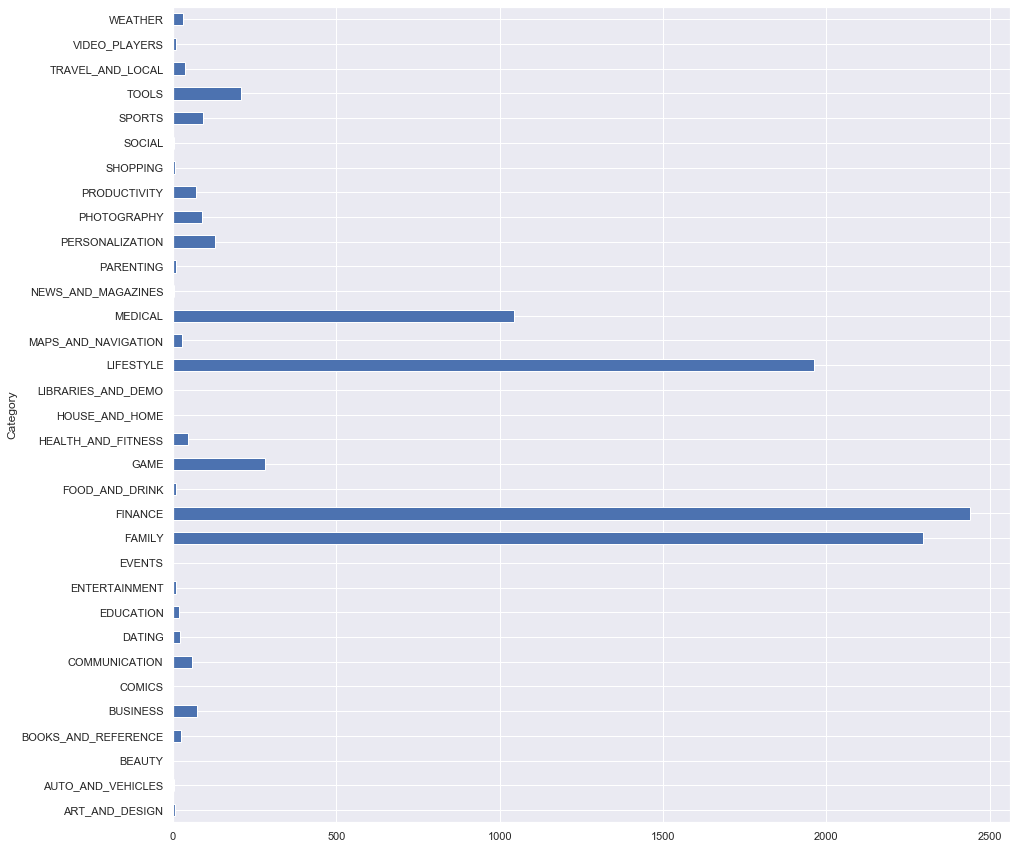

In [75]:
plt.figure(figsize=(15,15))
Prices = dif_cat.Price.sum().plot(kind = 'barh')

From the above graph it is clearly visible that `FINANCE` Category is expensive than others, Follwed by `FAMILY`, `LIFESTYLE` and `MIDICAL` has quite decent pricing. 
Also we can notice there are few Categories where most them have free Apps, such as `SOCIAL`, `COMICS`,`BEAUTY` etc.

In [76]:
import jovian

In [77]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "nishanth-k-s/google-appstore-analysis" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/nishanth-k-s/google-appstore-analysis


'https://jovian.ml/nishanth-k-s/google-appstore-analysis'

## Inferences and Conclusion

This NoteBook contains some basic anaysis, some of the Inferences from the analysis are listed below:
* The Average Rating of the App is 4.2, which is decent.
* Family Category has Highest number of Apps.
* Finance, Medical and Family apps are the most expensive in the Google store.
* Users tend to download a given app more if it has been reviewed by a large number of people.
* Social Media Apps have High number of installation and Active user.

The dataset contains immense possibilities to improve business values and have a positive impact. It is not limited to the problem taken into consideration for this project. Many other interesting possibilities can be explored using this dataset.

In [78]:
import jovian

In [79]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "nishanth-k-s/google-appstore-analysis" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/nishanth-k-s/google-appstore-analysis


'https://jovian.ml/nishanth-k-s/google-appstore-analysis'

## References and Future Work

* Prediction of the number of reviews and installs by using the regression model.
* Identifying the categories and stats of the most installed apps.
* Exploring the correlation between the size of the app, the version of Android, etc on the number of installs.
* The ways in which questions can be asked varies, so does the way of tackling a problem. Only the one that has been minutely observed and tested will provide results worth trusting.

* You can find the Kaggle Dataset [here](https://www.kaggle.com/lava18/google-play-store-apps)
* [Numpy_Documentation](https://numpy.org/doc/stable/user/quickstart.html)
* [Pandas_Documentation](https://pandas.pydata.org/docs/user_guide/index.html#user-guide)
* [Seaborn_Documentation](https://seaborn.pydata.org/)
* [Matplatlib_Documentation](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.html)

In [80]:
import jovian

In [81]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "nishanth-k-s/google-appstore-analysis" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/nishanth-k-s/google-appstore-analysis


'https://jovian.ml/nishanth-k-s/google-appstore-analysis'